In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
R = [20.1, 20, 19.9, 19.8, 19.7, 19.6, 19.5, 19.4, 19.3, 19.2, 19.1, 19, 18.9, 18.8] # [Ohm]
t = [88, 87, 84, 83, 82, 79, 75, 71.5, 69, 67, 65, 62, 60, 57.5] # [°C]

In [25]:
R22=[]
for k in R:
    R22.append(k**2)

tr=[]
for k in range(0,14):
    tr.append(R[k]*t[k])

In [23]:
print(len(tr))

14


In [22]:
print(tr)

[1768.8000000000002, 1740, 1671.6, 1643.4, 1615.3999999999999, 1548.4, 1462.5, 1387.1, 1331.7, 1286.3999999999999, 1241.5, 1178, 1134.0, 1081.0]


In [24]:
print(sum(tr))

20089.8


C:\Users\ELXMA\AppData\Local\Temp\ipykernel_14588\2667445039.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


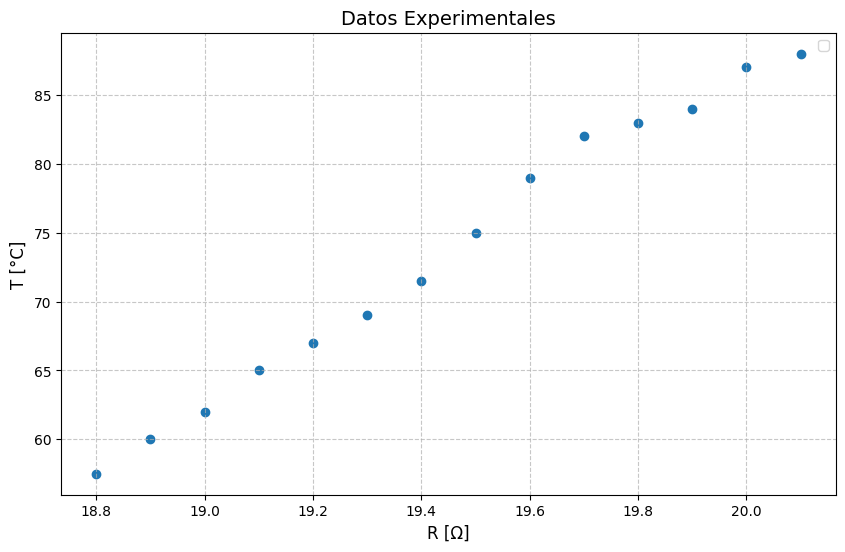

In [32]:
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.scatter(R,t)
# Configuraciones adicionales del gráfico
plt.title('Datos Experimentales', fontsize=14)
plt.xlabel('R [Ω]', fontsize=12)
plt.ylabel('T [°C]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)


# Mostrar el gráfico
plt.show()

C:\Users\ELXMA\AppData\Local\Temp\ipykernel_14588\1320806494.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


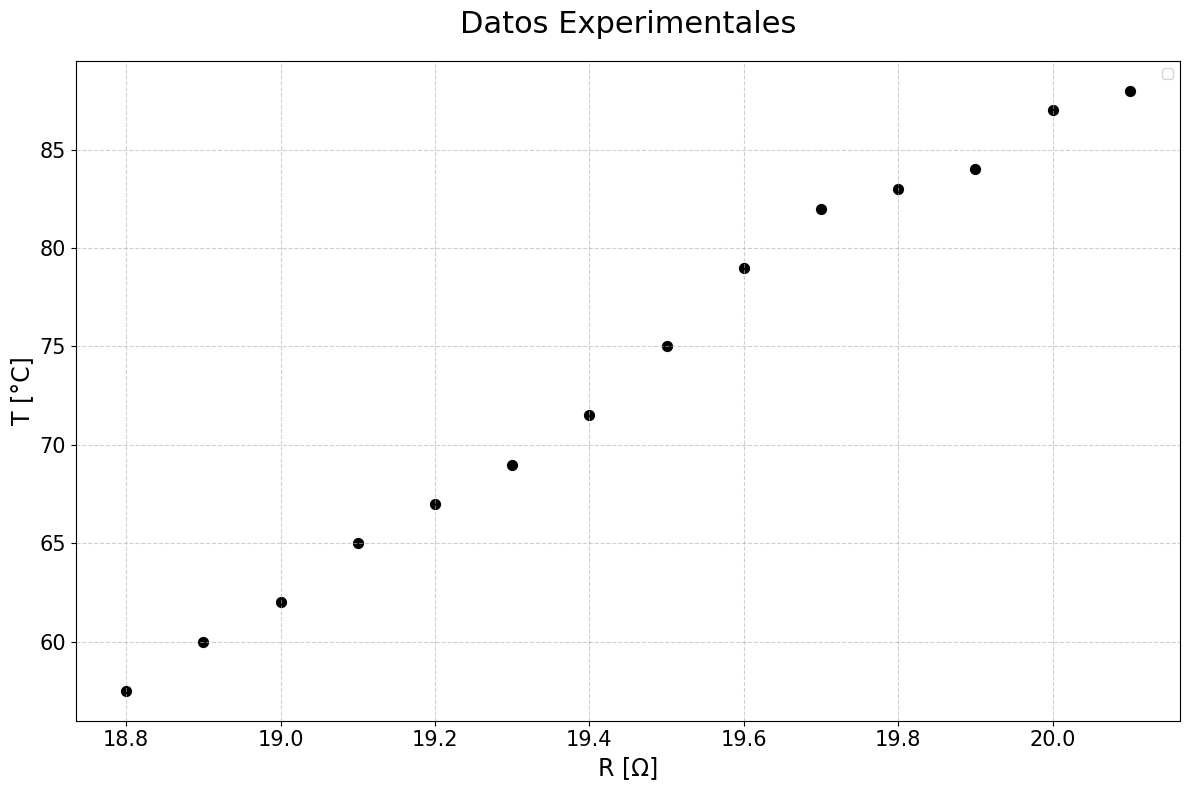

In [34]:
# Crear la gráfica con mejor visualización
plt.figure(figsize=(12, 8))
plt.scatter(R,t,color="black",s=50)
#plt.plot(t_vals, T_vals, color="silver", linewidth=1.5, alpha=0.8)  # Línea azul más gruesa
plt.title('Datos Experimentales', fontsize=22, pad=20)
plt.xlabel('R [Ω]', fontsize=17)
plt.ylabel('T [°C]', fontsize=17)

# Añadir leyenda
plt.legend(fontsize=10)

# Añadir grid y mejorar ejes
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()

# Mostrar la gráfica
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_14588\2794616716.py:13: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x, y, label=f'Ajuste lineal: T(R) = 24.27$\cdot$R -407.81', color='red')


La mejor ecuación lineal es: y = 24.7473x + -407.7626


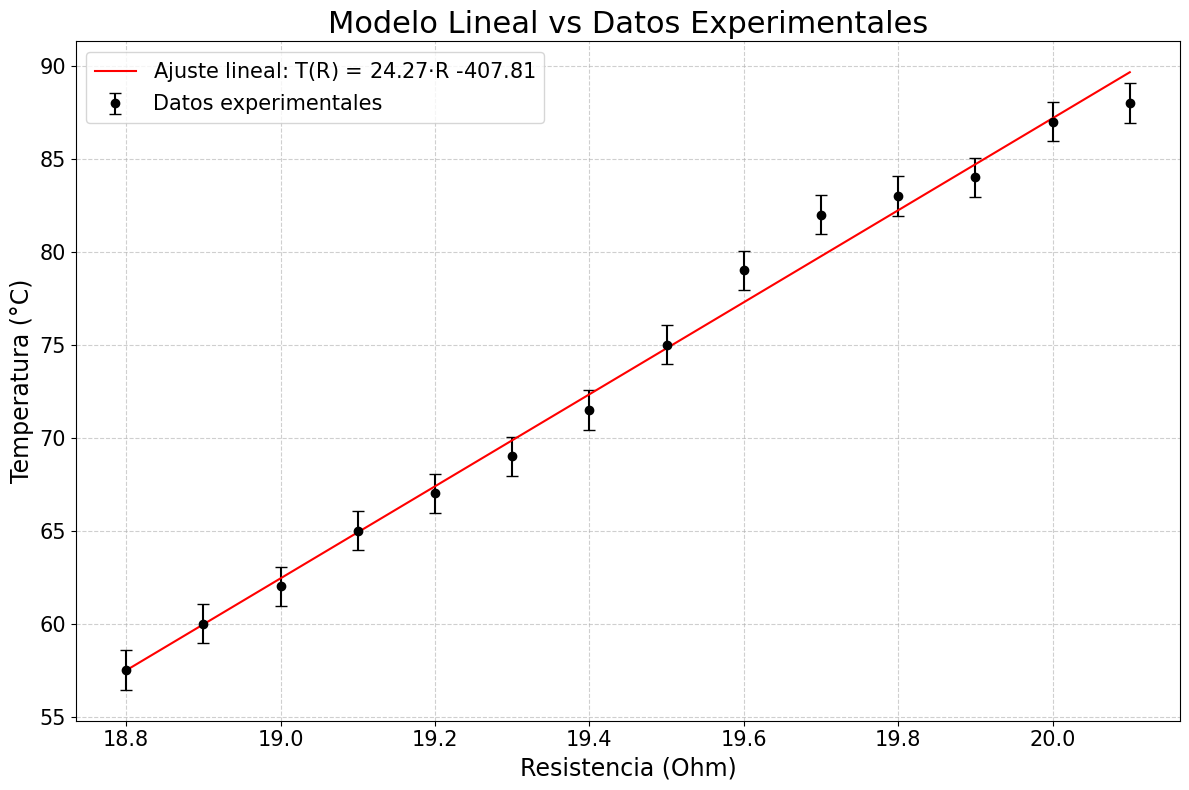

In [48]:
# Ajuste lineal
coeficientes = np.polyfit(R, t, 1)  # Grado 1: recta
m, b = coeficientes

print(f"La mejor ecuación lineal es: y = {m:.4f}x + {b:.4f}")

# Graficar datos y ajuste
x = np.linspace(min(R), max(R), 100)
y = m * x + b
plt.figure(figsize=(12, 8))
plt.errorbar(R,t,color="black", yerr=1.06, fmt='o', label='Datos experimentales', capsize=4)
#plt.scatter(R, t, label='Datos experimentales', color='red',s=50)
plt.plot(x, y, label=f'Ajuste lineal: T(R) = 24.27$\cdot$R -407.81', color='red')
plt.xlabel('Resistencia (Ohm)',fontsize=17)
plt.ylabel('Temperatura (°C)',fontsize=17)
plt.title('Modelo Lineal vs Datos Experimentales',fontsize=22)
plt.legend(fontsize=15)

# Añadir grid y mejorar ejes
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()

# Mostrar la gráfica

In [10]:
# Número de puntos
n = len(R)

# Sumas necesarias
sum_x = sum(R)
sum_y = sum(t)
sum_xy = sum(x*y for x, y in zip(R, t))
sum_x2 = sum(x**2 for x in R)

# Cálculo de pendientes y ordenada al origen
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

print(f"La ecuación de la recta es: y = {m:.4f}x + {b:.4f}")

La ecuación de la recta es: y = 24.7473x + -407.7626


In [ ]:
# Suma de cuadrados de residuos
T_pred = (24.75) * R + (407.81)
SS_res = np.sum((t - T_pred)**2)
SS_tot = np.sum((t - np.mean(t))**2)
R2 = 1 - (SS_res / SS_tot)

# Error estándar de la estimación (sigma_y)
sigma_y = np.sqrt(SS_res / (n - 2))

# Errores en parámetros
sigma_a = sigma_y * np.sqrt(n / (n * R22 - np.sum(R)**2))
sigma_b = sigma_y * np.sqrt(sum_R2 / (n * sum_R2 - sum_R**2))

# Resultados
print("----- Resultados del ajuste lineal T(R) = a·R + b -----")
print(f"Pendiente (a): {a:.4f} ± {sigma_a:.4f} °C/Ω")
print(f"Ordenada (b): {b:.4f} ± {sigma_b:.4f} °C")
print(f"Coeficiente de determinación R²: {R2:.6f}")
print(f"Error estándar de la estimación (σ_y): {sigma_y:.4f} °C")
print("\n----- Verificación con scipy.stats.linregress -----")
print(f"Scipy slope (a): {slope:.4f} ± {std_err:.4f}")
print(f"Scipy intercept (b): {intercept:.4f}")
print(f"Scipy R²: {r_value**2:.6f}")

In [30]:
from scipy import stats
n = len(R)
sum_R = np.sum(R)
sum_T = np.sum(t)
a=24.75;b=-407.81
T_pred = a* R +b
SS_res = np.sum((t - T_pred)**2)
SS_tot = np.sum((t - np.mean(t))**2)
R2 = 1 - (SS_res / SS_tot)

# Error estándar de la estimación (sigma_y)
sigma_y = np.sqrt(SS_res / (n - 2))

# Errores en parámetros
sigma_a = sigma_y * np.sqrt(n / (n * R22 - sum_R**2))
sigma_b = sigma_y * np.sqrt(R22 / (n * R22 - sum_R**2))
slope, intercept, r_value, p_value, std_err = stats.linregress(R, T)
# Resultados
print("----- Resultados del ajuste lineal T(R) = a·R + b -----")
print(f"Pendiente (a): {a:.4f} ± {sigma_a:.4f} °C/Ω")
print(f"Ordenada (b): {b:.4f} ± {sigma_b:.4f} °C")
print(f"Coeficiente de determinación R²: {R2:.6f}")
print(f"Error estándar de la estimación (σ_y): {sigma_y:.4f} °C")
print("\n----- Verificación con scipy.stats.linregress -----")
print(f"Scipy slope (a): {slope:.4f} ± {std_err:.4f}")
print(f"Scipy intercept (b): {intercept:.4f}")
print(f"Scipy R²: {r_value**2:.6f}")

TypeError: can't multiply sequence by non-int of type 'float'

In [31]:
# Datos experimentales
R = np.array([20.1, 20.0, 19.9, 19.8, 19.7, 19.6, 19.5, 19.4, 19.3, 19.2, 19.1, 19.0, 18.9, 18.8])  # [Ohm]
T = np.array([88.0, 87.0, 84.0, 83.0, 82.0, 79.0, 75.0, 71.5, 69.0, 67.0, 65.0, 62.0, 60.0, 57.5])  # [°C]

# Parámetros del modelo dado
a = 24.75  # Pendiente [°C/Ω]
b = -407.81  # Ordenada al origen [°C]

# --- Cálculo de errores y calidad del ajuste ---
n = len(R)
T_pred = a * R + b  # Valores predichos por el modelo

# 1. Suma de cuadrados de residuos y totales
SS_res = np.sum((T - T_pred)**2)
SS_tot = np.sum((T - np.mean(T))**2)

# 2. Error estándar de la estimación (σ_y)
sigma_y = np.sqrt(SS_res / (n - 2))

# 3. Errores en los parámetros (σ_a, σ_b)
sum_R = np.sum(R)
sum_R2 = np.sum(R**2)
denominator = n * sum_R2 - sum_R**2

sigma_a = sigma_y * np.sqrt(n / denominator)
sigma_b = sigma_y * np.sqrt(sum_R2 / denominator)

# 4. Coeficiente de determinación R²
R2 = 1 - (SS_res / SS_tot)

# --- Resultados ---
print("----- Análisis del modelo T(R) = a·R + b con parámetros fijos -----")
print(f"Parámetros dados: a = {a:.2f} °C/Ω, b = {b:.2f} °C")
print("\n----- Métricas de calidad del ajuste -----")
print(f"Suma de cuadrados de residuos (SS_res): {SS_res:.4f} °C²")
print(f"Error estándar de la estimación (σ_y): {sigma_y:.4f} °C")
print(f"Coeficiente de determinación R²: {R2:.6f}")
print("\n----- Incertidumbres en los parámetros -----")
print(f"Error en la pendiente (σ_a): {sigma_a:.4f} °C/Ω")
print(f"Error en la ordenada (σ_b): {sigma_b:.4f} °C")

----- Análisis del modelo T(R) = a·R + b con parámetros fijos -----
Parámetros dados: a = 24.75 °C/Ω, b = -407.81 °C

----- Métricas de calidad del ajuste -----
Suma de cuadrados de residuos (SS_res): 13.6588 °C²
Error estándar de la estimación (σ_y): 1.0669 °C
Coeficiente de determinación R²: 0.990292

----- Incertidumbres en los parámetros -----
Error en la pendiente (σ_a): 0.7073 °C/Ω
Error en la ordenada (σ_b): 13.7606 °C


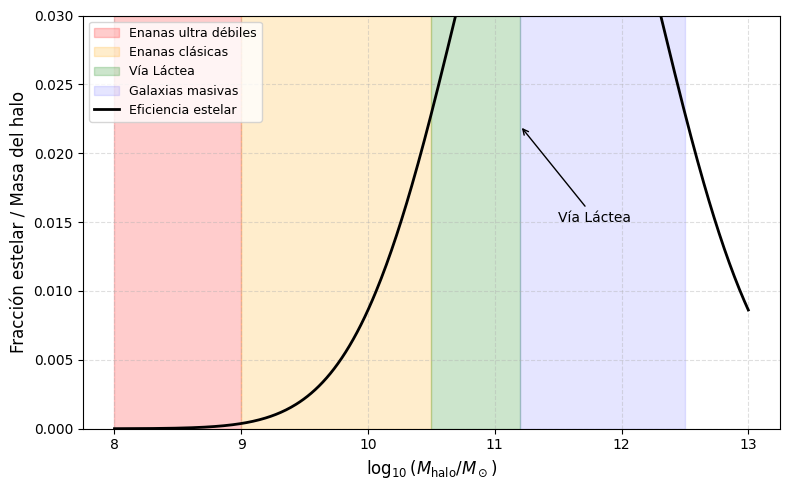

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos simulados para una curva log-normal (representación estilizada)
log_mhalo = np.linspace(8, 13, 500)  # log10(M_halo / M_sun)
mhalo = 10**log_mhalo
# Eficiencia estelar simulada (una especie de log-normal)
efficiency = 0.05 * np.exp(-((log_mhalo - 11.5)**2) / (2 * 0.8**2))

# Crear figura
fig, ax = plt.subplots(figsize=(8, 5))

# Sombreado de tipos de galaxias (colores suaves)
ax.axvspan(8, 9, color='red', alpha=0.2, label='Enanas ultra débiles')
ax.axvspan(9, 10.5, color='orange', alpha=0.2, label='Enanas clásicas')
ax.axvspan(10.5, 11.2, color='green', alpha=0.2, label='Vía Láctea')
ax.axvspan(11.2, 12.5, color='blue', alpha=0.1, label='Galaxias masivas')

# Curva de eficiencia
ax.plot(log_mhalo, efficiency, color='black', linewidth=2, label='Eficiencia estelar')

# Anotación de la Vía Láctea
ax.annotate('Vía Láctea',
            xy=(11.2, 0.022), xycoords='data',
            xytext=(11.5, 0.015), textcoords='data',
            arrowprops=dict(arrowstyle="->", color='black'))

# Escalas y etiquetas
ax.set_xlabel(r'$\log_{10}(M_{\mathrm{halo}}/M_\odot)$', fontsize=12)
ax.set_ylabel('Fracción estelar / Masa del halo', fontsize=12)
ax.set_ylim(0, 0.03)

# Leyenda
ax.legend(loc='upper left', fontsize=9)

# Estilo
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


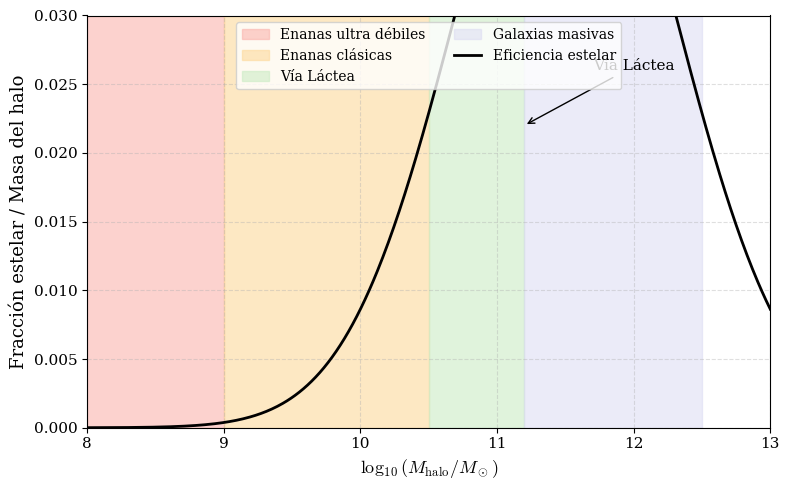

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Usar fuente tipo serif (como LaTeX)
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'  # Computer Modern

# Datos
log_mhalo = np.linspace(8, 13, 500)
mhalo = 10**log_mhalo
efficiency = 0.05 * np.exp(-((log_mhalo - 11.5)**2) / (2 * 0.8**2))

# Crear figura
fig, ax = plt.subplots(figsize=(8, 5))

# Colores personalizados más suaves
colors = {
    'ultra_débil': '#fbb4ae',
    'clásica': '#fdda9c',
    'vía_láctea': '#ccebc5',
    'masiva': '#d9d9f3'
}

# Áreas sombreadas
ax.axvspan(8, 9, color=colors['ultra_débil'], alpha=0.6, label='Enanas ultra débiles')
ax.axvspan(9, 10.5, color=colors['clásica'], alpha=0.6, label='Enanas clásicas')
ax.axvspan(10.5, 11.2, color=colors['vía_láctea'], alpha=0.6, label='Vía Láctea')
ax.axvspan(11.2, 12.5, color=colors['masiva'], alpha=0.5, label='Galaxias masivas')

# Curva
ax.plot(log_mhalo, efficiency, color='black', linewidth=2, label='Eficiencia estelar')

# Anotación mejorada
ax.annotate('Vía Láctea',
            xy=(11.2, 0.022), xycoords='data',
            xytext=(11.7, 0.026),
            textcoords='data',
            arrowprops=dict(arrowstyle="->", color='black'),
            fontsize=11)

# Etiquetas
ax.set_xlabel(r'$\log_{10}(M_{\mathrm{halo}}/M_\odot)$', fontsize=13)
ax.set_ylabel('Fracción estelar / Masa del halo', fontsize=13)

# Límites y formato
ax.set_ylim(0, 0.03)
ax.set_xlim(8, 13)

# Estilo de ejes
ax.grid(True, linestyle='--', alpha=0.4)
ax.tick_params(labelsize=11)

# Leyenda más clara
ax.legend(loc='upper center', ncol=2, fontsize=10, frameon=True)

plt.tight_layout()
plt.show()
